<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practice Bayesian Modelling on Auto Data


---

In this lab you will get some practice building models with `pymc3`. Please reference the preceding lesson on estimation and regression with `pymc3` for tips on how to code these models up.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.simplefilter('ignore')

### 1. Load the auto data. Perform any cleaning or EDA necessary.

In [3]:
auto = pd.read_csv('../../../../resource-datasets/auto_stats/Auto.csv')

In [7]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [15]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
country           int64
dtype: object

### 2. Create columns indicating if the car brand is from the USA, Asia, or Europe.

Take into account that some brand names are not given correctly.

In [10]:
auto.origin.unique()

array([1, 3, 2])

In [13]:
auto["country"]=auto["origin"]

In [16]:
auto["country"]=auto["country"].replace(1,"USA").replace(3,"Asia").replace(2,"Europe")

In [18]:
auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,country
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,USA
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,Europe
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,USA
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,USA
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,USA


### 3. Build a model with `pymc3` to estimate the difference in MPG between American and European cars.

Make sure to inspect the results visually using `pymc3`'s built-in plotting functions.

When setting up likelihood and priors, you could choose
- a normal distribution for mpg itself 
- a normal distribution for the mean of mpg 
- a uniform distribution for the standard deviation of mpg

Check [conjugate priors](https://en.wikipedia.org/wiki/Conjugate_prior#cite_note-beta_rate-6) for other suggestions.

In [3]:
import pymc3 as pm

In [20]:
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,country
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,USA


In [49]:
usa_mpg = auto[auto["country"]=="USA"].mpg

In [50]:
asia_mpg = auto[auto["country"]=="Asia"].mpg

In [51]:
eu_mpg = auto[auto["country"]=="Europe"].mpg

In [29]:
import scipy.stats as stats

In [39]:
tt = stats.ttest_ind(asia, usa)

In [40]:
print('t-statistic:\t', tt.statistic)
print('p-value:\t', tt.pvalue)

t-statistic:	 12.67722648020723
p-value:	 3.370227003938695e-30


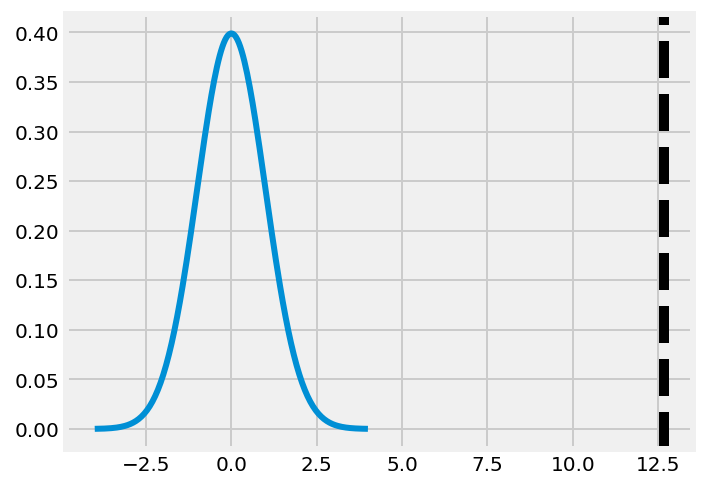

In [41]:
zdist = stats.norm(0, 1)
xvals = np.linspace(-4, 4, 200)

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(xvals, zdist.pdf(xvals), lw=3)
ax.axvline(tt.statistic, color='black', ls='dashed', lw=5)
plt.show()

In [42]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [43]:
mean_prior_mean = auto.mpg.mean()
mean_prior_std = auto.mpg.std()

In [44]:
mean_prior_mean

23.515869017632248

In [46]:
import pymc3 as pm

In [ ]:
#Construct the prior distributions on the means

In [47]:
# create the model instance
with pm.Model() as model:

    # priors for the mean
    usa_mean = pm.Normal(
        'usa_mean', mu=mean_prior_mean, sd=mean_prior_std)
    asia_mean = pm.Normal(
        'asia_mean', mu=mean_prior_mean, sd=mean_prior_std)
    europe_mean = pm.Normal(
        'europe_mean', mu=mean_prior_mean, sd=mean_prior_std)

In [ ]:
#Priors on standard deviations

In [48]:
std_prior_lower = 0.00001
std_prior_upper = 100.

with model:

    # priors for the standard deviations
    usa_std = pm.Uniform(
        'usa_std', lower=std_prior_lower, upper=std_prior_upper)
    asia_std = pm.Uniform(
        'asia_std', lower=std_prior_lower, upper=std_prior_upper)
    europe_std = pm.Uniform(
        'europe_std', lower=std_prior_lower, upper=std_prior_upper)

In [ ]:
#Set up the APM distributions for the groups

In [52]:
with model:
    # likelihood functions for the age group apms
    # the likelihood functions make use of the observed data
    # and refer to the prior distributions
    usa = pm.Normal('usa_mpg', mu=usa_mean,
                        sd=usa_std, observed=usa_mpg)
    asia = pm.Normal('asia_mpg', mu=asia_mean,
                        sd=asia_std, observed=asia_mpg)
    eu = pm.Normal('eu_mpg', mu=europe_mean,
                        sd=europe_std, observed=eu_mpg)

In [53]:
# Tracking additional metrics

In [56]:
with model:
    # create deterministic distributions for the parameter differences
    diff_of_means = pm.Deterministic('mean_diff', usa_mean - europe_mean)
    diff_of_stds = pm.Deterministic('std_diff', usa_std - europe_std)

In [58]:
with model:
    # create samples from the posterior distribution
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [europe_std, asia_std, usa_std, europe_mean, asia_mean, usa_mean]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:07<00:00, 2820.15draws/s]


In [59]:
model

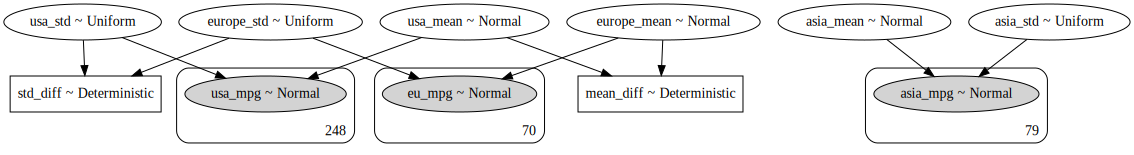

In [60]:
pm.model_to_graphviz(model)

In [61]:
len(trace)

5000

In [62]:
trace[0]

{'usa_mean': 20.72001451292209,
 'asia_mean': 30.15068099023824,
 'europe_mean': 27.881984181226272,
 'usa_std_interval__': -2.7136883582961255,
 'asia_std_interval__': -2.660638950044942,
 'europe_std_interval__': -2.573303586319308,
 'usa_std': 6.217054677441935,
 'asia_std': 6.53363969902404,
 'europe_std': 7.087653736255633,
 'mean_diff': -7.161969668304181,
 'std_diff': -0.8705990588136983}

### 4. Build a regression predicting MPG from predictors of your choice using `pymc3`.

You can construct the model at the granular level, or if you prefer use the patsy-formula model syntax (easier). Plot out the posterior distributions of your coefficients for your model.

Set up the distributions as in the lesson. For the regression coefficients you can choose normal distributions as a setup.